### housekeeping

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sys
import matplotlib.pyplot as plt
import pickle

In [2]:
plt.rcParams.update({'font.size': 14})

### reading/processing the dataset

In [3]:
with open(r"C5.pkl", "rb") as f:
    df, df_units, df_info = pickle.load(f)
    
df = df.reset_index()
df.drop(columns = ['WSTAT_W1', 'FPR'], inplace=True)
#df.rename(columns={'TIME': 'days', 'YEARS': 'years', 'TIMESTEP': 'dt', 'WBHP_W1': 'p', 'WWIR_W1': 'q'}, inplace=True)
df.head()

,TIME,YEARS,TIMESTEP,WBHP_W1,WWIR_W1
0,0.000000,0.000000e+00,0.000000,300.0000,0.0
1,0.000020,5.480000e-08,0.000020,300.4551,245.0
2,0.000041,1.120000e-07,0.000021,300.8956,245.0
3,0.000063,1.730000e-07,0.000022,301.3207,245.0
4,0.000086,2.360000e-07,0.000023,301.7302,245.0


* TIME - time (days)
* YEARS - time (years)
* TIMESTEP - timestep length (days)
* WBHP_W1 - well bottomhole pressure (bar) at TIME/YEARS
* WWIR_W1 - well injection rate (sm3/day). 
    NB! the simulator reports rates in a bit confusing manner: above WWIR_W1 of 245 @0.000020 days means that the rate was 245 sm3/day    between 0 and 0.000020 days. I.e. @0 days, the injection rate is zero, but then immediatelly changes to 245 sm3/day

In [1]:
0.000020*24

0.00048000000000000007

In [4]:
df['dp'] = df['WBHP_W1'].diff()
df['dp/dt'] = np.nan
# the derivative is shiftet by one step earlier (i.e. the forward derivative)!
df['dp/dt'].iloc[0:-1] = df['dp'].iloc[1:]/df['TIMESTEP'].iloc[1:]
df.head()

,TIME,YEARS,TIMESTEP,WBHP_W1,WWIR_W1,dp,dp/dt
0,0.000000,0.000000e+00,0.000000,300.0000,0.0,NaN,22755.000000
1,0.000020,5.480000e-08,0.000020,300.4551,245.0,0.4551,20976.190476
2,0.000041,1.120000e-07,0.000021,300.8956,245.0,0.4405,19235.294118
3,0.000063,1.730000e-07,0.000022,301.3207,245.0,0.4251,17650.862069
4,0.000086,2.360000e-07,0.000023,301.7302,245.0,0.4095,16185.185185


### Visualization by Matplotlib

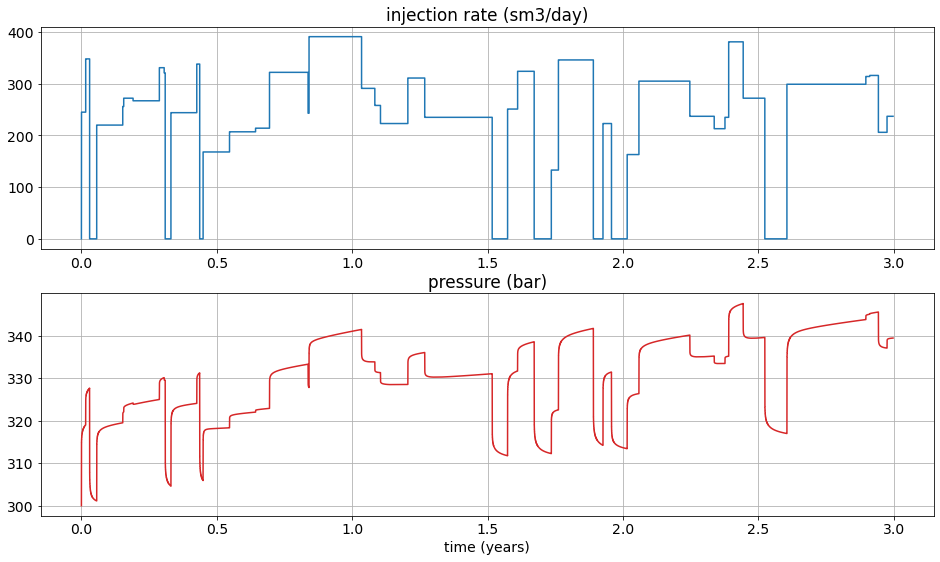

In [5]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(16,9))
ax1.plot(df['YEARS'], df['WWIR_W1']); 
ax1.grid();
ax1.set_title('injection rate (sm3/day)'); 
ax2.step(df['YEARS'], df['WBHP_W1'], color = 'tab:red', where='pre'); 
ax2.grid(); ax2.set_xlabel('time (years)')
ax2.set_title('pressure (bar)'); 

### Visualization by Bokeh

In [6]:
#!pip install bokeh

In [7]:
from bokeh.io import output_notebook, output_file, reset_output, show
from bokeh.plotting import figure, gridplot
from bokeh.models import LinearAxis, Range1d,ColumnDataSource, HoverTool

In [9]:
output_notebook()
#output_file('c5.html') # uncomment to plot in the separate window
x1_name = 'TIME'
y1_name = 'WWIR_W1'
y2_name = 'WBHP_W1'
y3_name = 'dp/dt'
x2_name = x1_name
x3_name = x1_name
# create a column data source for the plots to share
source = ColumnDataSource(data=df)
TOOLS = "box_select,lasso_select,box_zoom,xpan,xwheel_zoom,undo,redo,reset"
clr1 = 'dodgerblue'
clr2 = 'dodgerblue'
# create a new plot and add a renderer
plot1 = figure(tools=TOOLS, plot_width=1000, plot_height=200, title=None, 
             y_axis_label='Liquid rate (sm3/day)')
plot1.line(x1_name, y1_name, source=source, color = clr1,
           nonselection_alpha = 0.75, 
           selection_color="orangered", line_width=1)
plot1.circle(x1_name, y1_name, size=2, source=source, color = clr2,
            nonselection_alpha = 0.75, selection_color="red") # selection_color="black" , color = 'dodgerblue'

plot2 = figure(tools=TOOLS, plot_width=1000, plot_height=200, title=None, 
             x_range=plot1.x_range, y_axis_label='pressure (bar)')
plot2.line(x2_name, y2_name, source=source, color = clr1, nonselection_alpha = 0.75, selection_color="orangered", line_width=1)
plot2.circle(x2_name, y2_name, size=2, source=source, color = clr2, 
           nonselection_alpha = 0.75, selection_color="red")

plot3 = figure(tools=TOOLS, plot_width=1000, plot_height=200, title=None, 
             x_range=plot1.x_range, y_axis_label='pressure derivative')
plot3.line(x3_name, y3_name, source=source, color = clr1, nonselection_alpha = 0.75, selection_color="orangered", line_width=1)
plot3.circle(x3_name, y3_name, size=2, source=source, color = clr2, 
           nonselection_alpha = 0.75, selection_color="red")

foo = gridplot([plot1, plot2, plot3], ncols = 1)
show(foo)

Loading BokehJS ...